In [1]:
import torch
import os
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import v2
from PIL import Image
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
# paths
csv_file = '/Users/shivamgoyal/Desktop/DL/Project/archive/indiana_projections.csv'
image_folder = '/Users/shivamgoyal/Desktop/DL/Project/images_png'

In [3]:
import pandas as pd

# Load the CSV
csv_file = '/Users/shivamgoyal/Desktop/DL/Project/archive/indiana_projections.csv'
data = pd.read_csv(csv_file)

# Ensure the filenames match the actual files in the folder
data['filename'] = data['filename'].apply(lambda x: f"CXR{x}.png" if not x.startswith("CXR") else x)

# Save the modified CSV
modified_csv_file = '/Users/shivamgoyal/Desktop/DL/Project/modified_indiana_projections.csv'
data.to_csv(modified_csv_file, index=False)
print(f"Modified CSV saved to: {modified_csv_file}")

Modified CSV saved to: /Users/shivamgoyal/Desktop/DL/Project/modified_indiana_projections.csv


In [4]:
df = pd.read_csv('modified_csv_file.csv')
df.head(n=50)

,uid,filename,projection
0,1,CXR1_IM-0001-4001.png,Frontal
1,1,CXR1_IM-0001-3001.png,Lateral
2,2,CXR2_IM-0652-1001.png,Frontal
3,2,CXR2_IM-0652-2001.png,Lateral
4,3,CXR3_IM-1384-1001.png,Frontal
5,3,CXR3_IM-1384-2001.png,Lateral
6,4,CXR4_IM-2050-1001.png,Frontal
7,4,CXR4_IM-2050-2001.png,Lateral
8,5,CXR5_IM-2117-1003002.png,Frontal
9,5,CXR5_IM-2117-1004003.png,Lateral


3D volume saved at /Users/shivamgoyal/Desktop/DL/Project/3D_images/generated_3d_volume.nii
Epoch 1/50, Loss: 387.8716
Epoch 2/50, Loss: 43.4681
Epoch 3/50, Loss: 23.7136
Epoch 4/50, Loss: 23.2476
Epoch 5/50, Loss: 12.6534
Epoch 6/50, Loss: 3.1426
Epoch 7/50, Loss: 14.7665
Epoch 8/50, Loss: 13.4362
Epoch 9/50, Loss: 5.7932
Epoch 10/50, Loss: 3.8536
Epoch 11/50, Loss: 3.7976
Epoch 12/50, Loss: 2.2034
Epoch 13/50, Loss: 5.1027
Epoch 14/50, Loss: 0.6371
Epoch 15/50, Loss: 0.5592
Epoch 16/50, Loss: 2.5205
Epoch 17/50, Loss: 5.3091
Epoch 18/50, Loss: 2.2128
Epoch 19/50, Loss: 0.3619
Epoch 20/50, Loss: 2.4281
Epoch 21/50, Loss: 3.6500
Epoch 22/50, Loss: 0.7323
Epoch 23/50, Loss: 6.5620
Epoch 24/50, Loss: 1.3281
Epoch 25/50, Loss: 0.6760
Epoch 26/50, Loss: 1.9495
Epoch 27/50, Loss: 0.7528
Epoch 28/50, Loss: 1.7674
Epoch 29/50, Loss: 1.7521
Epoch 30/50, Loss: 0.4797
Epoch 31/50, Loss: 0.7425
Epoch 32/50, Loss: 0.5378
Epoch 33/50, Loss: 0.5946
Epoch 34/50, Loss: 0.8052
Epoch 35/50, Loss: 0.8244


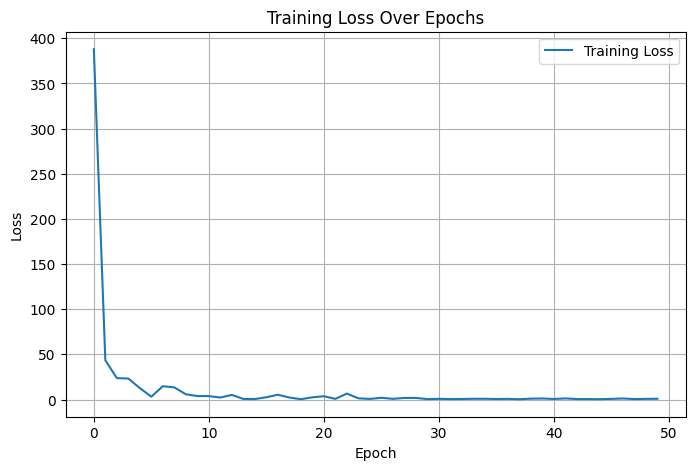

SNR: 29.46 dB
SSIM: 0.9959


In [20]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import nibabel as nib
from scipy.ndimage import zoom
from torchvision.transforms import RandomRotation
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim


# Step 1: Preprocess 2D images into a 3D volume
def create_3d_image(image_folder, output_folder, output_filename="generated_3d_volume.nii", target_shape=(64, 64, 64)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images = []
    filenames = sorted([f for f in os.listdir(image_folder) if f.endswith(".png")])
    
    for filename in filenames:
        filepath = os.path.join(image_folder, filename)
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        img = cv2.resize(img, target_shape[:2])  # Resize to match target shape (width, height)
        images.append(img)
    
    # Stack images along the third dimension
    volume = np.stack(images, axis=-1)
    volume = zoom(volume, [target_shape[0] / volume.shape[0], target_shape[1] / volume.shape[1], target_shape[2] / volume.shape[2]], order=1)  # Resize depth

    # Save as a 3D NIfTI file
    nii = nib.Nifti1Image(volume, np.eye(4))
    output_path = os.path.join(output_folder, output_filename)
    nib.save(nii, output_path)
    print(f"3D volume saved at {output_path}")
    return output_path


# Step 2: Define a simple 3D CNN
class Simple3DCNN(nn.Module):
    def __init__(self, input_shape=(1, 64, 64, 64)):
        super(Simple3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv3d(8, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool3d(kernel_size=2, stride=2)

        with torch.no_grad():
            x = torch.zeros(input_shape)
            x = self.pool(self.conv1(x))
            x = self.pool(self.conv2(x))
            self.flattened_size = x.numel()

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 2)

        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Step 3: Create a dataset class for 3D volumes with augmentation
class AugmentedVolumeDataset(Dataset):
    def __init__(self, volume_paths, labels, target_shape=(64, 64, 64), augment=False):
        self.volume_paths = volume_paths
        self.labels = labels
        self.target_shape = target_shape
        self.augment = augment
        self.transform = RandomRotation(degrees=20) if augment else None

    def __len__(self):
        return len(self.volume_paths)

    def __getitem__(self, idx):
        volume_path = self.volume_paths[idx]
        label = self.labels[idx]
        volume = nib.load(volume_path).get_fdata()
        volume = zoom(volume, [self.target_shape[0] / volume.shape[0], 
                               self.target_shape[1] / volume.shape[1], 
                               self.target_shape[2] / volume.shape[2]], order=1)
        volume = torch.tensor(volume, dtype=torch.float32).unsqueeze(0)
        if self.augment:
            volume = self.transform(volume)
        return volume, torch.tensor(label, dtype=torch.long)


# Step 4: Train the 3D CNN with loss plotting
def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(dataloader)
        losses.append(avg_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")
    return losses


def plot_loss(losses):
    plt.figure(figsize=(8, 5))
    plt.plot(losses, label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()


# Step 5: Calculate SNR and SSIM
def calculate_snr(original, generated):
    signal_power = np.mean(original ** 2)
    noise_power = np.mean((original - generated) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr


def calculate_ssim(original, generated):
    return ssim(original, generated, data_range=generated.max() - generated.min())


# Usage Example
image_folder = '/Users/shivamgoyal/Desktop/DL/Project/images_png'
output_folder = '/Users/shivamgoyal/Desktop/DL/Project/3D_images'
volume_path = create_3d_image(image_folder, output_folder)

volume_paths = [volume_path, volume_path]
labels = [0, 1]
dataset = AugmentedVolumeDataset(volume_paths, labels, augment=True)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

device = torch.device('cpu')
model = Simple3DCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
losses = train_model(model, dataloader, criterion, optimizer, num_epochs=50)
plot_loss(losses)

# Calculate SNR and SSIM
noisy_volume = original_volume + np.random.normal(0, 2.5, original_volume.shape)

# Normalize the volumes for SSIM calculation
original_volume_norm = (original_volume - np.min(original_volume)) / (np.max(original_volume) - np.min(original_volume))
noisy_volume_norm = (noisy_volume - np.min(noisy_volume)) / (np.max(noisy_volume) - np.min(noisy_volume))

# Calculate SNR
snr_value = calculate_snr(original_volume_norm, noisy_volume_norm)

# Calculate SSIM
ssim_value = calculate_ssim(original_volume_norm, noisy_volume_norm)

print(f"SNR: {snr_value:.2f} dB")
print(f"SSIM: {ssim_value:.4f}")

In [21]:
# Save the model's state dictionary
model_save_path = "/Users/shivamgoyal/Desktop/DL/Project/3D_model/simple_3d_cnn.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /Users/shivamgoyal/Desktop/DL/Project/3D_model/simple_3d_cnn.pth


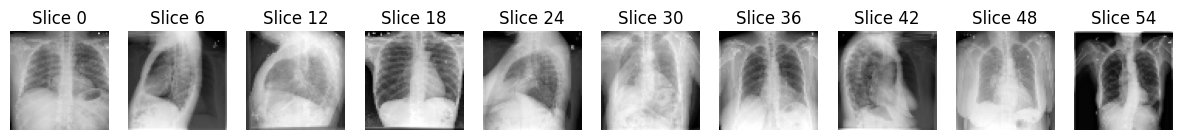

In [22]:
import matplotlib.pyplot as plt
import nibabel as nib

# Load the 3D volume
volume_path = '/Users/shivamgoyal/Desktop/DL/Project/3D_images/generated_3d_volume.nii'
volume_data = nib.load(volume_path).get_fdata()

# Function to display slices
def display_slices(volume, axis=2, num_slices=10):
    slices = volume.shape[axis]
    step = slices // num_slices  # Step size for evenly spaced slices
    
    plt.figure(figsize=(15, 5))
    for i, slice_idx in enumerate(range(0, slices, step)):
        if i >= num_slices:  # Show only the specified number of slices
            break
        if axis == 0:
            slice_data = volume[slice_idx, :, :]
        elif axis == 1:
            slice_data = volume[:, slice_idx, :]
        else:
            slice_data = volume[:, :, slice_idx]
        
        plt.subplot(1, num_slices, i + 1)
        plt.imshow(slice_data, cmap='gray')
        plt.axis('off')
        plt.title(f"Slice {slice_idx}")
    plt.show()

# Display 10 slices along the depth (axis 2)
display_slices(volume_data, axis=2, num_slices=10)

MovieWriter imagemagick unavailable; using Pillow instead.


GIF saved to /Users/shivamgoyal/Desktop/DL/Project/3D_images/3d_volume.gif


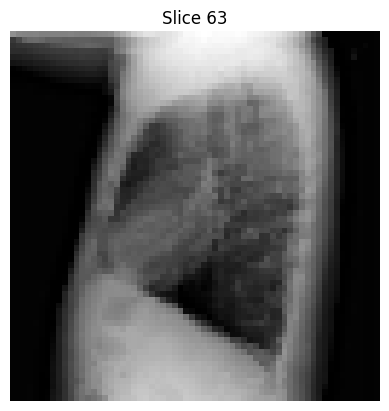

In [23]:
from matplotlib.animation import FuncAnimation

def create_gif(volume, output_path='3d_volume.gif', axis=2):
    fig, ax = plt.subplots()

    def update(frame):
        ax.clear()
        if axis == 0:
            slice_data = volume[frame, :, :]
        elif axis == 1:
            slice_data = volume[:, frame, :]
        else:
            slice_data = volume[:, :, frame]
        ax.imshow(slice_data, cmap='gray')
        ax.set_title(f"Slice {frame}")
        ax.axis('off')

    anim = FuncAnimation(fig, update, frames=volume.shape[axis], interval=100)
    anim.save(output_path, writer='imagemagick')
    print(f"GIF saved to {output_path}")

# Create a GIF for the 3D volume
create_gif(volume_data, output_path="/Users/shivamgoyal/Desktop/DL/Project/3D_images/3d_volume.gif", axis=2)

In [24]:
import os
import cv2
import numpy as np
import nibabel as nib
import pandas as pd

# Load the CSV
csv_file = 'modified_csv_file.csv'
df = pd.read_csv(csv_file)

# Inspect the DataFrame
print(df.head())

# Paths to images and output folder
image_folder = '/Users/shivamgoyal/Desktop/DL/Project/images_png'
output_folder = '/Users/shivamgoyal/Desktop/DL/Project/3D_images'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to create a 3D image from Frontal and Lateral views
def create_3d_from_pair(uid, df, image_folder, output_folder):
    # Filter rows for the given uid
    patient_data = df[df['uid'] == uid]
    
    # Get filenames for Frontal and Lateral images
    try:
        frontal_image_file = patient_data[patient_data['projection'] == 'Frontal']['filename'].values[0]
        lateral_image_file = patient_data[patient_data['projection'] == 'Lateral']['filename'].values[0]
    except IndexError:
        print(f"Missing Frontal or Lateral image for uid {uid}. Skipping...")
        return
    
    # Load the images
    frontal_image_path = os.path.join(image_folder, frontal_image_file)
    lateral_image_path = os.path.join(image_folder, lateral_image_file)
    
    frontal_image = cv2.imread(frontal_image_path, cv2.IMREAD_GRAYSCALE)
    lateral_image = cv2.imread(lateral_image_path, cv2.IMREAD_GRAYSCALE)

    if frontal_image is None or lateral_image is None:
        print(f"Error loading images for uid {uid}. Skipping...")
        return

    # Resize images to the same shape
    target_shape = (256, 256)  # Adjust the target size as needed
    frontal_image = cv2.resize(frontal_image, target_shape)
    lateral_image = cv2.resize(lateral_image, target_shape)

    # Stack frontal and lateral images to create a 3D volume
    volume = np.stack([frontal_image, lateral_image], axis=-1)

    # Save as a NIfTI file
    output_path = os.path.join(output_folder, f"uid_{uid}_3d.nii")
    nii = nib.Nifti1Image(volume, np.eye(4))
    nib.save(nii, output_path)
    print(f"3D image saved at {output_path}")

# Iterate through each unique UID and create 3D images
for uid in df['uid'].unique():
    create_3d_from_pair(uid, df, image_folder, output_folder)

   uid               filename projection
0    1  CXR1_IM-0001-4001.png    Frontal
1    1  CXR1_IM-0001-3001.png    Lateral
2    2  CXR2_IM-0652-1001.png    Frontal
3    2  CXR2_IM-0652-2001.png    Lateral
4    3  CXR3_IM-1384-1001.png    Frontal
3D image saved at /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_1_3d.nii
3D image saved at /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_2_3d.nii
3D image saved at /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_3_3d.nii
3D image saved at /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_4_3d.nii
3D image saved at /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_5_3d.nii
3D image saved at /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_6_3d.nii
3D image saved at /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_7_3d.nii
3D image saved at /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_8_3d.nii
3D image saved at /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_9_3d.nii
3D image saved at /Users/shivamgoyal/Deskto

In [25]:
print(df.columns)

Index(['uid', 'filename', 'projection'], dtype='object')


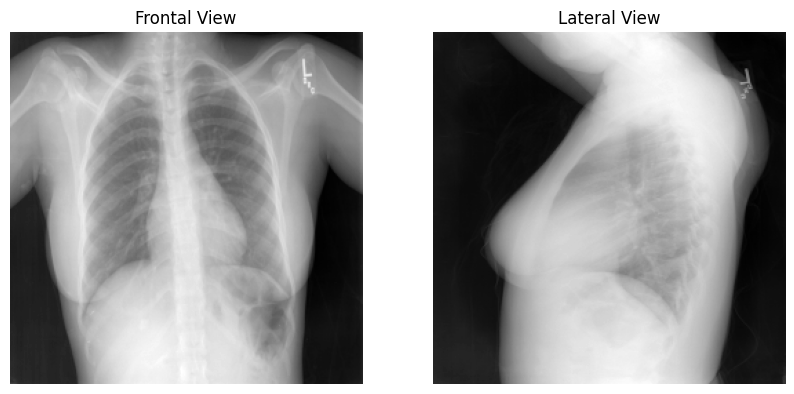

In [32]:
import nibabel as nib
import matplotlib.pyplot as plt

# Path to one of the generated .nii files
nii_file = '/Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_1_3d.nii'

# Load the volume
volume = nib.load(nii_file).get_fdata()

# Display slices
plt.figure(figsize=(10, 5))

# Frontal view slice
plt.subplot(1, 2, 1)
plt.imshow(volume[:, :, 0], cmap='gray')  # Frontal slice
plt.title("Frontal View")
plt.axis('off')

# Lateral view slice
plt.subplot(1, 2, 2)
plt.imshow(volume[:, :, 1], cmap='gray')  # Lateral slice
plt.title("Lateral View")
plt.axis('off')

plt.show()

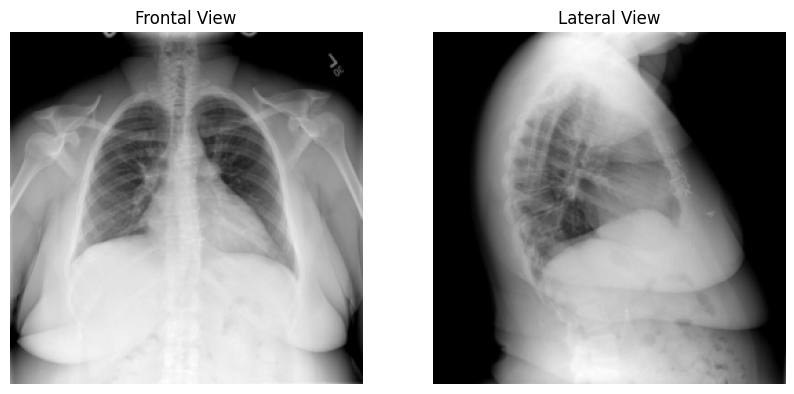

In [33]:
nii_file = '/Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_2_3d.nii'

# Load the volume
volume = nib.load(nii_file).get_fdata()

# Display slices
plt.figure(figsize=(10, 5))

# Frontal view slice
plt.subplot(1, 2, 1)
plt.imshow(volume[:, :, 0], cmap='gray')  # Frontal slice
plt.title("Frontal View")
plt.axis('off')

# Lateral view slice
plt.subplot(1, 2, 2)
plt.imshow(volume[:, :, 1], cmap='gray')  # Lateral slice
plt.title("Lateral View")
plt.axis('off')

plt.show()

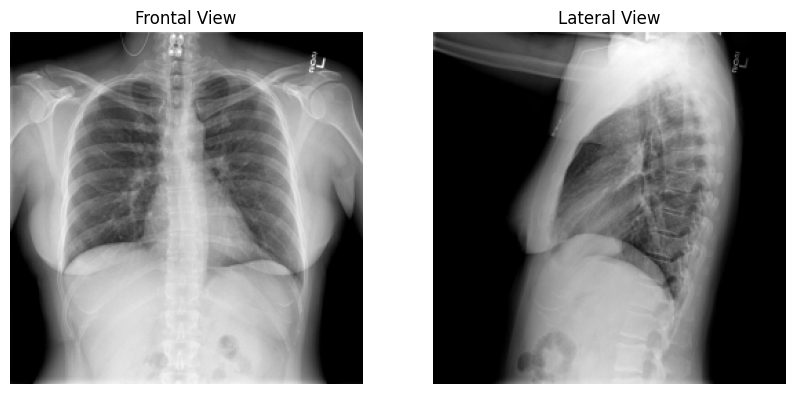

In [34]:
nii_file = '/Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_3_3d.nii'

# Load the volume
volume = nib.load(nii_file).get_fdata()

# Display slices
plt.figure(figsize=(10, 5))

# Frontal view slice
plt.subplot(1, 2, 1)
plt.imshow(volume[:, :, 0], cmap='gray')  # Frontal slice
plt.title("Frontal View")
plt.axis('off')

# Lateral view slice
plt.subplot(1, 2, 2)
plt.imshow(volume[:, :, 1], cmap='gray')  # Lateral slice
plt.title("Lateral View")
plt.axis('off')

plt.show()

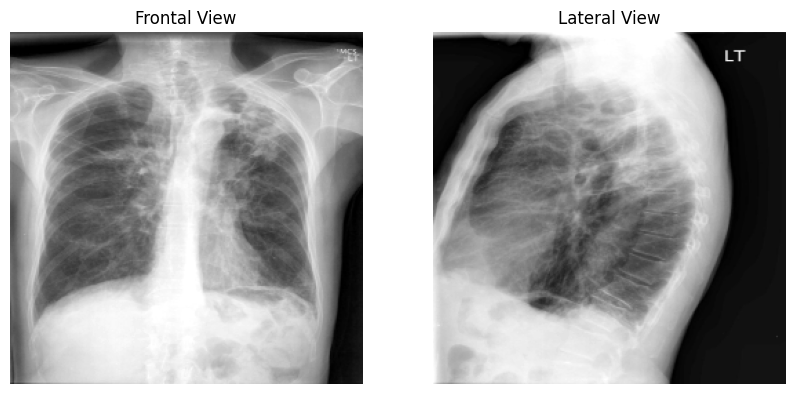

In [35]:
nii_file = '/Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_4_3d.nii'

# Load the volume
volume = nib.load(nii_file).get_fdata()

# Display slices
plt.figure(figsize=(10, 5))

# Frontal view slice
plt.subplot(1, 2, 1)
plt.imshow(volume[:, :, 0], cmap='gray')  # Frontal slice
plt.title("Frontal View")
plt.axis('off')

# Lateral view slice
plt.subplot(1, 2, 2)
plt.imshow(volume[:, :, 1], cmap='gray')  # Lateral slice
plt.title("Lateral View")
plt.axis('off')

plt.show()

In [36]:
plotter.add_volume?

Signature:
plotter.add_volume(
    volume,
    scalars=None,
    clim=None,
    resolution=None,
    opacity='linear',
    n_colors=256,
    cmap=None,
    flip_scalars=False,
    reset_camera=None,
    name=None,
    ambient=None,
    categories=False,
    culling=False,
    multi_colors=False,
    blending='composite',
    mapper=None,
    scalar_bar_args=None,
    show_scalar_bar=None,
    annotations=None,
    pickable=True,
    preference='point',
    opacity_unit_distance=None,
    shade=False,
    diffuse=0.7,
    specular=0.2,
    specular_power=10.0,
    render=True,
    user_matrix=None,
    log_scale=False,
    **kwargs,
)
Docstring:
Add a volume, rendered using a smart mapper by default.

Requires a 3D data type like :class:`numpy.ndarray`,
:class:`pyvista.ImageData`, :class:`pyvista.RectilinearGrid`,
or :class:`pyvista.UnstructuredGrid`.

Parameters
----------
volume : 3D numpy.ndarray | pyvista.DataSet
    The input volume to visualize. 3D numpy arrays are accepted.

    

Rendering: /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_1_3d.nii


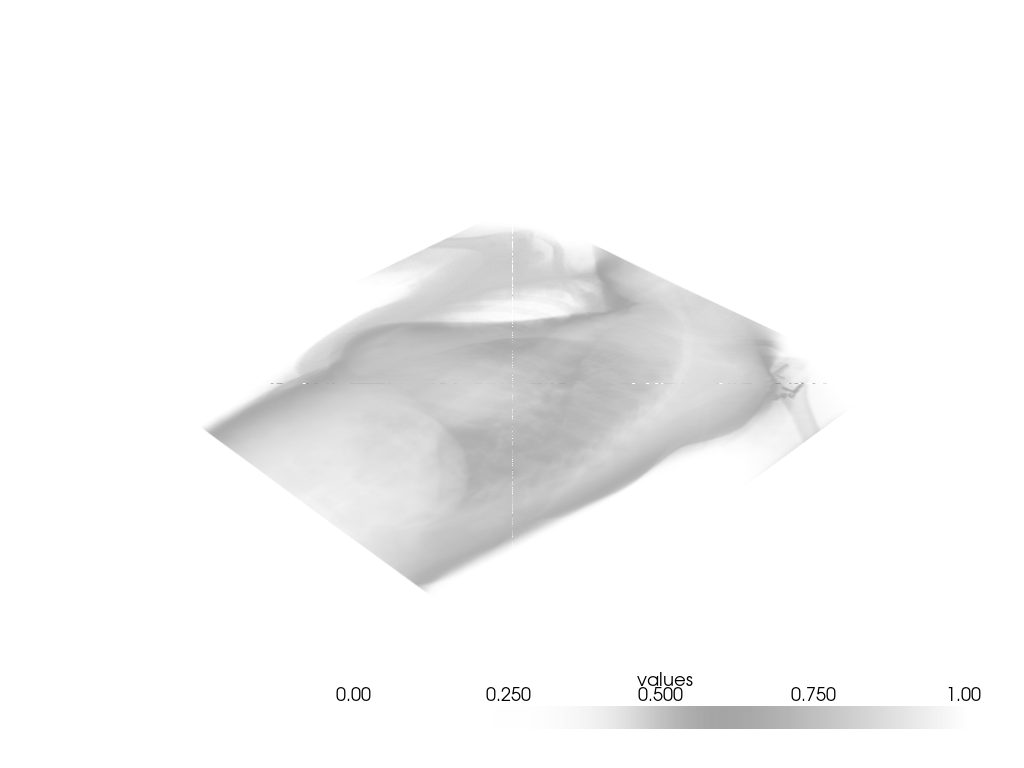

Rendering: /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_2_3d.nii


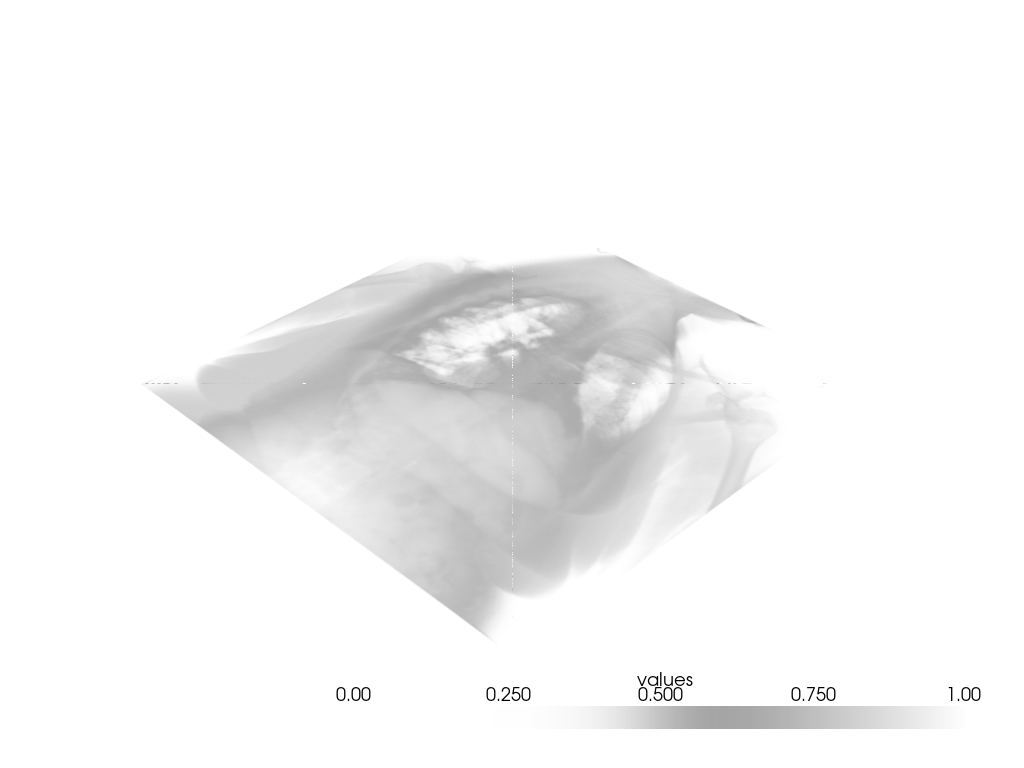

Rendering: /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_3_3d.nii


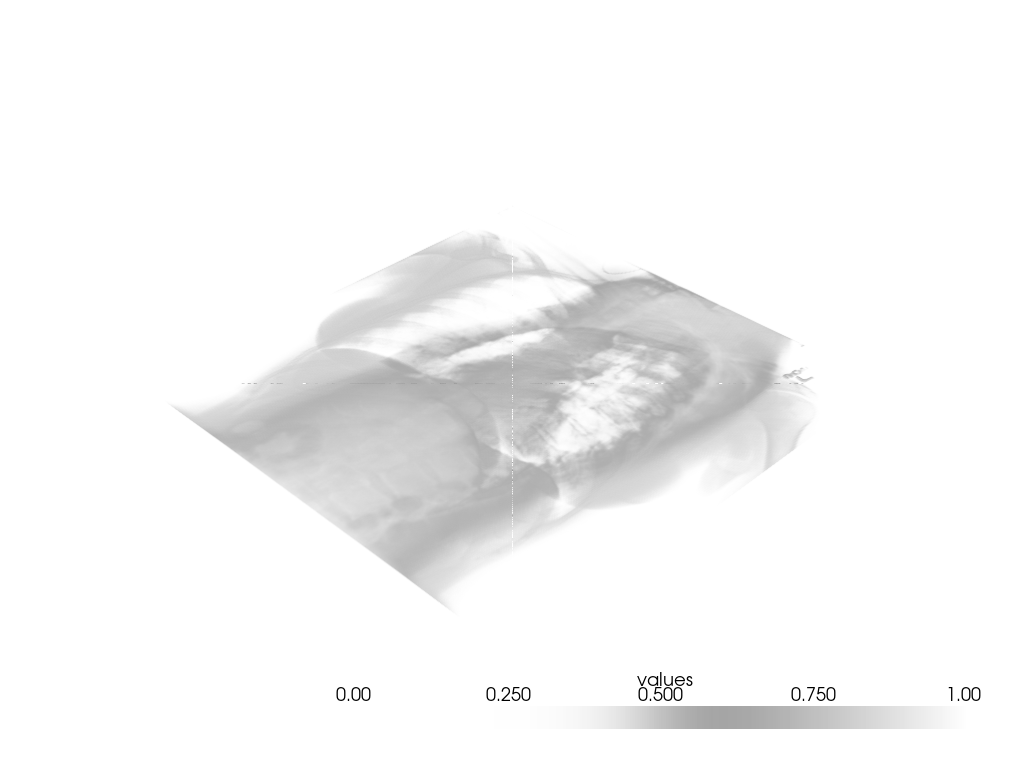

Rendering: /Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_4_3d.nii


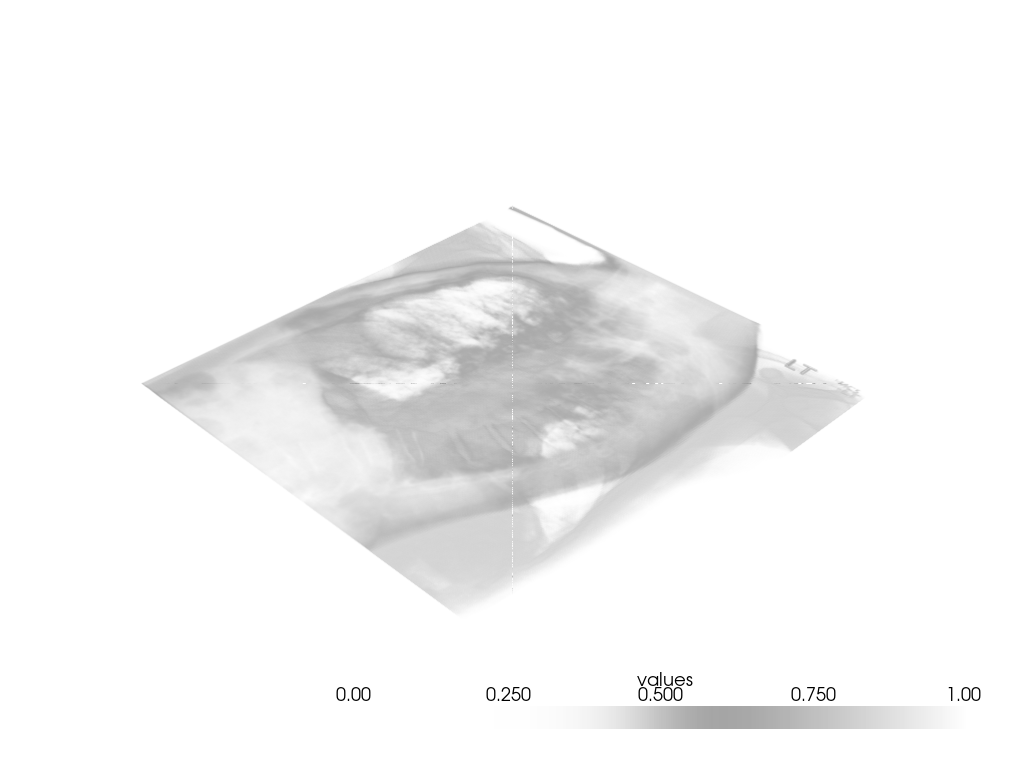

In [37]:
import warnings
warnings.filterwarnings("ignore")

import pyvista as pv
import nibabel as nib
import numpy as np
import os

# List of .nii files to visualize
nii_files = [
    '/Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_1_3d.nii',
    '/Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_2_3d.nii',
    '/Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_3_3d.nii',
    '/Users/shivamgoyal/Desktop/DL/Project/3D_images/uid_4_3d.nii'
]

# Function to render a 3D volume
def render_volume(nii_file):
    if not os.path.exists(nii_file):
        print(f"File not found: {nii_file}")
        return
    
    # Load the volume
    volume = nib.load(nii_file).get_fdata()

    # Normalize the volume for visualization
    normalized_volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))

    # Get the grid dimensions
    nx, ny, nz = normalized_volume.shape

    # Create the coordinates for the grid
    x = np.linspace(0, nx - 1, nx)
    y = np.linspace(0, ny - 1, ny)
    z = np.linspace(0, nz - 1, nz)
    x, y, z = np.meshgrid(x, y, z, indexing="ij")

    # Create a StructuredGrid
    grid = pv.StructuredGrid(x, y, z)
    grid.point_data["values"] = normalized_volume.flatten(order="F")

    # Render the 3D volume
    plotter = pv.Plotter()
    plotter.add_volume(grid, cmap="gray", opacity="sigmoid")
    plotter.show()

# Render each volume
for nii_file in nii_files:
    print(f"Rendering: {nii_file}")
    render_volume(nii_file)